0.5414268530180221


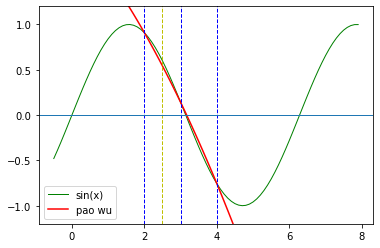

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


class Lagrange:
    def __init__(self, key, value, begin, size):
        self.size = size
        self.begin = begin
        self.key = key
        self.value = value

    def calculate(self, parameter):
        if self.size < 2:
            raise (Exception, "点数必须大于等于2")
        sum = 0
        for i in range(self.begin, self.begin + self.size):
            j = 0
            tmp = self.value[i]
            for j in range(0, self.size):
                if j != i - self.begin:
                    tmp *= (parameter - self.key[j + self.begin]) / (self.key[i] - self.key[j + self.begin])
            sum += tmp
        return sum

    def getValueArray(self, key_array):
        data = []
        for i in key_array:
            data.append(self.calculate(i))
        return data


if __name__ == "__main__":
    key = [1, 2, 3, 4, 5]
    value = [math.sin(1), math.sin(2), math.sin(3), math.sin(4), math.sin(5)]
    lag = Lagrange(key, value, 1, 3)
    print(lag.calculate(2.5))

    t = np.arange(-0.5, 8, 0.1)
    data = []
    for item in t:
        data.append(math.sin(item))
    # red dashes, blue squares and green triangles
    plt.plot(t, data, label="sin(x)", color="green", linewidth=1)
    plt.plot(t, lag.getValueArray(t), 'r', label="pao wu")
    plt.axvline(x=2, ymin=0, ymax=4, linewidth=1, color='b', ls='--')
    plt.axvline(x=3, ymin=0, ymax=9, linewidth=1, color='b', ls='--')
    plt.axvline(x=4, ymin=0, ymax=9, linewidth=1, color='b', ls='--')
    plt.axvline(x=2.5, ymin=0, ymax=9, linewidth=1, color='y', ls='--')
    plt.axhline(y=0, linewidth=1)

    # Y轴的范围
    plt.ylim(-1.2, 1.2)

    # 显示图示
    plt.legend()
    plt.show()

In [4]:
import requests
import re
import codecs
from bs4 import BeautifulSoup
from openpyxl import Workbook
wb = Workbook()
dest_filename = '电影.xlsx'
ws1 = wb.active
ws1.title = "电影top250"

DOWNLOAD_URL = 'http://movie.douban.com/top250/'


def download_page(url):
    """获取url地址页面内容"""
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36'
    }
    data = requests.get(url, headers=headers).content
    return data


def get_li(doc):
    soup = BeautifulSoup(doc, 'html.parser')
    ol = soup.find('ol', class_='grid_view')
    name = []  # 名字
    star_con = []  # 评价人数
    score = []  # 评分
    info_list = []  # 短评
    for i in ol.find_all('li'):
        detail = i.find('div', attrs={'class': 'hd'})
        movie_name = detail.find(
            'span', attrs={'class': 'title'}).get_text()  # 电影名字
        level_star = i.find(
            'span', attrs={'class': 'rating_num'}).get_text()  # 评分
        star = i.find('div', attrs={'class': 'star'})
        star_num = star.find(text=re.compile('评价'))  # 评价

        info = i.find('span', attrs={'class': 'inq'})  # 短评
        if info:  # 判断是否有短评
            info_list.append(info.get_text())
        else:
            info_list.append('无')
        score.append(level_star)

        name.append(movie_name)
        star_con.append(star_num)
    page = soup.find('span', attrs={'class': 'next'}).find('a')  # 获取下一页
    if page:
        return name, star_con, score, info_list, DOWNLOAD_URL + page['href']
    return name, star_con, score, info_list, None


def main():
    url = DOWNLOAD_URL
    name = []
    star_con = []
    score = []
    info = []
    while url:
        doc = download_page(url)
        movie, star, level_num, info_list, url = get_li(doc)
        name = name + movie
        star_con = star_con + star
        score = score + level_num
        info = info + info_list
    for (i, m, o, p) in zip(name, star_con, score, info):
        col_A = 'A%s' % (name.index(i) + 1)
        col_B = 'B%s' % (name.index(i) + 1)
        col_C = 'C%s' % (name.index(i) + 1)
        col_D = 'D%s' % (name.index(i) + 1)
        ws1[col_A] = i
        ws1[col_B] = m
        ws1[col_C] = o
        ws1[col_D] = p
    wb.save(filename=dest_filename)


if __name__ == '__main__':
    main()

In [3]:
class StringToList:
    @staticmethod
    def to_int_list(data, split_character=' '):
        data = data.strip()
        str_list = data.split(split_character)
        res_list = []
        for value in str_list:
            res_list.append(int(value))
        return res_list

    @staticmethod
    def to_float_list(data, split_character=' '):
        data = data.strip()
        str_list = data.split(split_character)
        res_list = []
        for value in str_list:
            res_list.append(float(value))
        return res_list

    @staticmethod
    def to_str_list(data, split_character=' '):
        data = data.strip()
        str_list = data.split(split_character)
        return str_list

In [5]:
from bs4 import BeautifulSoup
import requests
from openpyxl import Workbook
excel_name = "书籍.xlsx"
wb = Workbook()
ws1 = wb.active
ws1.title='书籍'


def get_html(url):
    header = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'}
    html = requests.get(url, headers=header).content
    return html


def get_con(html):
    soup = BeautifulSoup(html,'html.parser')
    book_list = soup.find('div', attrs={'class': 'article'})
    page = soup.find('div', attrs={'class': 'paginator'})
    next_page = page.find('span', attrs={'class': 'next'}).find('a')
    name = []
    for i in book_list.find_all('table'):
        book_name = i.find('div', attrs={'class': 'pl2'})
        m = list(book_name.find('a').stripped_strings)
        if len(m)>1:
            x = m[0]+m[1]
        else:
            x = m[0]
        #print(x)
        name.append(x)
    if next_page:
        return name, next_page.get('href')
    else:
        return name, None


def main():
    url = 'https://book.douban.com/top250'
    name_list=[]
    while url:
        html = get_html(url)
        name, url = get_con(html)
        name_list = name_list + name
    for i in name_list:
        location = 'A%s'%(name_list.index(i)+1)
        print(i)
        print(location)
        ws1[location]=i
    wb.save(filename=excel_name)


if __name__ == '__main__':
    main()

红楼梦
A1
活着
A2
1984
A3
百年孤独
A4
飘
A5
三体全集: 地球往事三部曲
A6
三国演义（全二册）
A7
房思琪的初恋乐园
A8
动物农场
A9
白夜行
A10
福尔摩斯探案全集（上中下）
A11
小王子
A12
天龙八部
A13
安徒生童话故事集
A14
撒哈拉的故事
A15
冰与火之歌（卷一）: 权力的游戏
A16
哈利·波特
A17
沉默的大多数: 王小波杂文随笔全编
A18
人类简史: 从动物到上帝
A19
平凡的世界（全三部）
A20
围城
A21
杀死一只知更鸟
A22
局外人
A23
明朝那些事儿（1-9）: 限量版
A24
霍乱时期的爱情
A25
笑傲江湖（全四册）
A26
中国历代政治得失
A27
月亮和六便士
A28
肖申克的救赎
A29
呐喊
A30
基督山伯爵
A31
东方快车谋杀案
A32
万历十五年
A33
追风筝的人
A34
新名字的故事: 那不勒斯四部曲2
A35
失踪的孩子: 那不勒斯四部曲4
A36
江城
A37
乡土中国
A38
刀锋
A39
嫌疑人X的献身
A40
城南旧事: 纪念普及版
A41
射雕英雄传（全四册）
A42
寻路中国: 从乡村到工厂的自驾之旅
A43
白鹿原: 20周年精装典藏版
A44
我与地坛: 史铁生代表作
A45
格林童话全集
A46
傲慢与偏见
A47
黄金时代: 时代三部曲
A48
无人生还
A49
野草
A50
历史深处的忧虑: 近距离看美国之一
A51
艺术的故事
A52
文学回忆录: 1989—1994
A53
神雕侠侣
A54
史记（全十册）
A55
悲惨世界（上中下）
A56
彷徨
A57
许三观卖血记
A58
卡拉马佐夫兄弟
A59
上帝掷骰子吗: 量子物理史话
A60
朝花夕拾
A61
树上的男爵
A62
邓小平时代
A63
哭泣的骆驼
A64
灿烂千阳
A65
看见
A66
诗经
A67
浪潮之巅
A68
西游记（全二册）
A69
台北人
A70
永恒的终结: 关于时间旅行的终极奥秘和恢宏构想
A71
窗边的小豆豆
A72
悉达多
A73
人间词话
A74
爱你就像爱生命
A75
我们仨
A76
一个叫欧维的男人决定去死
A77
最好的告别: 关于衰老与死亡，你必须知道的常识
A78
巨人的陨落: 世纪三部曲
A79
呼兰河传: 1947年版本・原版珍藏
A8

captcha: sdf


**2**: {'client_id': 'c3cef7c66a1843f8b3a9e6a1e3160e20', 'grant_type': 'password', 'timestamp': '1609321258946', 'source': 'com.zhihu.web', 'signature': '866d964be9dce80c680b7845fd40348221cc3fac', 'username': '12345678@qq.com', 'password': '12345678', 'lang': 'cn', 'captcha': 'sdf', 'ref_source': 'other_', 'utm_source': ''}
--------------------------------------------------
{
    "error": {
        "code": 10001,
        "message": "10001:\u8bf7\u6c42\u53c2\u6570\u5f02\u5e38\uff0c\u8bf7\u5347\u7ea7\u5ba2\u6237\u7aef\u540e\u91cd\u8bd5"
    }
}

--------------------------------------------------
<!DOCTYPE html>

<html data-theme="light" lang="zh"><head><meta charset="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta content="width=device-width,initial-scale=1,maximum-scale=1" name="viewport"/><meta content="webkit" name="renderer"/><meta content="webkit" name="force-rendering"/><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/><meta content="FTeR0c8arOPKh8c5D
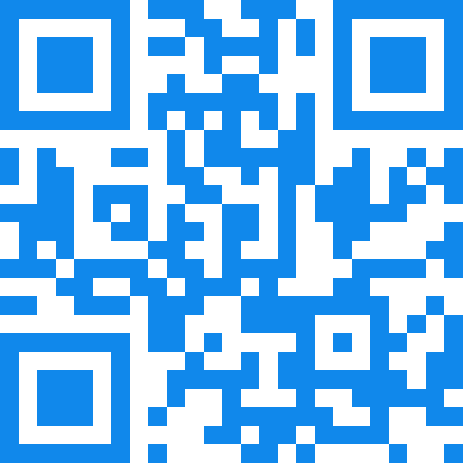

In [6]:
import  requests , time
import  hmac ,json
from bs4 import BeautifulSoup
from hashlib import sha1


def get_captcha(data,need_cap):
    ''' 处理验证码 '''
    if need_cap is False:
        return
    with open('captcha.gif','wb') as fb:
        fb.write(data)
    return input('captcha:')
    
def get_signature(grantType,clientId,source,timestamp):
    ''' 处理签名 '''
	
    hm = hmac.new(b'd1b964811afb40118a12068ff74a12f4',None,sha1)
    hm.update(str.encode(grantType))
    hm.update(str.encode(clientId))
    hm.update(str.encode(source))
    hm.update(str.encode(timestamp))

    return  str(hm.hexdigest())



def login(username,password,oncaptcha,sessiona,headers):
    ''' 处理登录 '''
    
    resp1 = sessiona.get('https://www.zhihu.com/signin',headers=headers)  # 拿cookie:_xsrf
    resp2 = sessiona.get('https://www.zhihu.com/api/v3/oauth/captcha?lang=cn',headers=headers)  # 拿cookie:capsion_ticket 
    need_cap = json.loads(resp2.text)["show_captcha"]  # {"show_captcha":false} 表示不用验证码

    grantType = 'password'
    clientId = 'c3cef7c66a1843f8b3a9e6a1e3160e20'
    source ='com.zhihu.web'
    timestamp = str((time.time()*1000)).split('.')[0]  # 签名只按这个时间戳变化
       
    captcha_content = sessiona.get('https://www.zhihu.com/captcha.gif?r=%d&type=login'%(time.time()*1000),headers=headers).content
    
    data = {
        "client_id":clientId,
        "grant_type":grantType,
        "timestamp":timestamp,
        "source":source,
        "signature": get_signature(grantType,clientId,source,timestamp), # 获取签名
        "username":username,
        "password":password,
        "lang":"cn",
        "captcha":oncaptcha(captcha_content,need_cap), # 获取图片验证码
        "ref_source":"other_",
        "utm_source":""
    }
    
    print("**2**: "+str(data))
    print("-"*50)
    resp = sessiona.post('https://www.zhihu.com/api/v3/oauth/sign_in',data,headers=headers).content
    print(BeautifulSoup(resp,'html.parser'))
    
    print("-"*50)
    return resp 

if __name__ == "__main__":
    sessiona = requests.Session()
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0','authorization':'oauth c3cef7c66a1843f8b3a9e6a1e3160e20'}

    login('12345678@qq.com','12345678',get_captcha,sessiona,headers) # 用户名密码换自己的就好了
    resp = sessiona.get('https://www.zhihu.com/inbox',headers=headers)  # 登录进去了，可以看私信了
    print(BeautifulSoup(resp.content ,'html.parser'))
    